In [1]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('simvision_pixel_TDC.csv', skiprows=1) ## Skip first row SimTime = 0

In [ ]:
### Original column names
### 'SimTime',
### 'ETROC2_tb.ETROC2_inst.PixelMatrix_HTree_inst.PixelCol_inst_1.Pixel_inst_2.PixelAnalog_inst.TDC_CAL[9:0]'
### 'ETROC2_tb.ETROC2_inst.PixelMatrix_HTree_inst.PixelCol_inst_1.Pixel_inst_2.PixelAnalog_inst.TDC_TOA[9:0]'
### 'ETROC2_tb.ETROC2_inst.PixelMatrix_HTree_inst.PixelCol_inst_1.Pixel_inst_2.PixelAnalog_inst.TDC_TOT[8:0]'
### 'ETROC2_tb.ETROC2_inst.PixelMatrix_HTree_inst.PixelCol1_inst_14.Pixel1_inst_14.PixelAnalog1_inst.TDC_CAL[9:0]'
### 'ETROC2_tb.ETROC2_inst.PixelMatrix_HTree_inst.PixelCol1_inst_14.Pixel1_inst_14.PixelAnalog1_inst.TDC_TOA[9:0]'
### 'ETROC2_tb.ETROC2_inst.PixelMatrix_HTree_inst.PixelCol1_inst_14.Pixel1_inst_14.PixelAnalog1_inst.TDC_TOT[8:0]'

### Replace column names (only when TDC file has been opened)
df.columns = ['SimTime', 'Row1Col2_TDC_CAL', 'Row1Col2_TDC_TOA', 'Row1Col2_TDC_TOT', 
              'Row14Col14_TDC_CAL', 'Row14Col14_TDC_TOA', 'Row14Col14_TDC_TOT']

In [ ]:
df.head()

In [ ]:
### Covert hex to decimal
row1col2_cal = df['Row1Col2_TDC_CAL'].squeeze()
row1col2_toa = df['Row1Col2_TDC_TOA'].squeeze()
b16 = lambda x: int(x, 16)
row1col2_cal = row1col2_cal.apply(b16)
row1col2_toa = row1col2_toa.apply(b16)

In [ ]:
### plotting
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("1st row, 2nd column pixel TDC values", fontsize=14)
ax1.hist(row1col2_cal)
ax1.set_xlabel('CAL code', fontsize=12)

ax2.scatter(row1col2_toa, df['Row1Col2_TDC_TOT'])
ax2.grid()
ax2.set_xlabel('TOA code', fontsize=12)
ax2.set_ylabel('TOT code', fontsize=12)

In [ ]:
### Covert hex to decimal
row14col14_cal = df['Row14Col14_TDC_CAL'].squeeze()
row14col14_toa = df['Row14Col14_TDC_TOA'].squeeze()
row14col14_cal = row14col14_cal.apply(b16)
row14col14_toa = row14col14_toa.apply(b16)

In [ ]:
### plotting
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("14th row, 14th column pixel TDC values", fontsize=14)
ax1.hist(row14col14_cal)
ax1.set_xlabel('CAL code', fontsize=12)

ax2.scatter(row14col14_toa, df['Row14Col14_TDC_TOT'])
ax2.grid()
ax2.set_xlim(425, 438)
ax2.set_xlabel('TOA code', fontsize=12)
ax2.set_ylabel('TOT code', fontsize=12)

In [ ]:
df2 = pd.read_csv('simv ision_fastcmd_data.csv', skiprows=1)

In [ ]:
### Original column names
### 'SimTime' 
### 'ETROC2_tb.FCGenLocal_inst.FastComByte[7:0]'

### Replace column names (only when fast command file has been opened)
df2.columns = ['SimTime', 'FastComByte']
df2.head()

In [ ]:
df2['FastComByte']
### F0 (1111 0000): Idle
### 69 (0110 1001): Charge injection
### 5A (0101 1010): BCR (Bunch counter reset at BC0, reset the counter to zero)
### 96 (1001 0110): L1A
### Reference: https://indico.cern.ch/event/1127562/contributions/4904781/attachments/2454504/4319592/ETROCemulator%20slides20220921.pdf

In [ ]:
### create a list of our conditions
conditions = [
    (df2['FastComByte'] == 'F0'),
    (df2['FastComByte'] == '69'),
    (df2['FastComByte'] == '5A'),
    (df2['FastComByte'] == '96')
    ]

### create a list of the values we want to assign for each condition
values = ['Idle', 'Charge injection', 'BCR', 'L1A']

### create a new column and use np.select to assign values to it using our lists as arguments
df2['fcmd_defn'] = np.select(conditions, values)

### display updated DataFrame
print(df2)

In [2]:
### Under develop
df3 = pd.read_csv('simvision.csv', skiprows=1)
df3.columns = ['SimTime', 'DOR', 'DOL']
df3 = df3.drop(columns=['DOL'])
df3 = df3.iloc[:-1 , :] ## drop the last row

In [3]:
df3

,SimTime,DOR
0,133809921000,1
1,133811481000,0
2,133813041000,1
3,133816161000,0
4,133839561000,1
...,...,...
1098885,3506373911000,0
1098886,3506377031000,1
1098887,3506381711000,0
1098888,3506383271000,1


In [4]:
sim = df3.diff(periods=-1).fillna(0)
sim['SimTime'] = sim['SimTime'].abs()*0.001
sim['nth'] = sim['SimTime']/1560.
sim.head(10)

,SimTime,DOR,nth
0,1560.0,1.0,1.0
1,1560.0,-1.0,1.0
2,3120.0,1.0,2.0
3,23400.0,-1.0,15.0
4,1560.0,1.0,1.0
5,3120.0,-1.0,2.0
6,4680.0,1.0,3.0
7,1560.0,-1.0,1.0
8,1560.0,1.0,1.0
9,4680.0,-1.0,3.0


In [52]:
df3['diff'] = sim['SimTime'] ## Time difference between (nth, (n+1)th) row, n = 0, 1, 2, ...
df3['cycle'] = sim['nth']
df3.head(20)

,SimTime,DOR,diff,cycle
0,133809921000,1,1560.0,1.0
1,133811481000,0,1560.0,1.0
2,133813041000,1,3120.0,2.0
3,133816161000,0,23400.0,15.0
4,133839561000,1,1560.0,1.0
5,133841121000,0,3120.0,2.0
6,133844241000,1,4680.0,3.0
7,133848921000,0,1560.0,1.0
8,133850481000,1,1560.0,1.0
9,133852041000,0,4680.0,3.0


In [65]:
### Repeat rows in a pandas DataFrame based on column value
### https://stackoverflow.com/questions/47336704/repeat-rows-in-a-pandas-dataframe-based-on-column-value
bit_df = df3.reindex(df3.index.repeat(df3.cycle))
bit_df = bit_df.drop(columns=['SimTime', 'diff', 'cycle'])
bit_df = bit_df.reset_index(drop=True)
test.head(25)

,DOR
0,1
1,0
2,1
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [61]:
### 3C5C pattern recognition
### Only check whether the data has 3C5C pattern at anywhere or not
### 3 C 5 C (hex)
### 0011 1100 0101 1100 (binary)
pattern = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]

matched = test.rolling(len(pattern)).apply(lambda x: all(np.equal(x, pattern)), raw=True)
matched = matched.sum(axis = 1).astype(bool)   #Sum to perform boolean OR
idx_matched = np.where(matched)[0]
subset = [range(match-len(pattern)+1, match+1) for match in idx_matched]   
#aligned_data = pd.concat([aligned_data.iloc[subs,:] for subs in subset], axis = 0)
#aligned_data.reset_index(inplace=True, drop=True)

In [72]:
subset

[range(1668, 1684),
 range(13948, 13964),
 range(22148, 22164),
 range(34428, 34444),
 range(42628, 42644),
 range(54588, 54604),
 range(62788, 62804),
 range(73268, 73284),
 range(85548, 85564),
 range(93748, 93764),
 range(106028, 106044),
 range(114228, 114244),
 range(126188, 126204),
 range(134388, 134404),
 range(146668, 146684),
 range(154868, 154884),
 range(167148, 167164),
 range(175348, 175364),
 range(187308, 187324),
 range(195508, 195524),
 range(207788, 207804),
 range(215988, 216004),
 range(228268, 228284),
 range(236468, 236484),
 range(248428, 248444),
 range(256628, 256644),
 range(268908, 268924),
 range(277108, 277124),
 range(289388, 289404),
 range(297268, 297284),
 range(309548, 309564),
 range(317748, 317764),
 range(330028, 330044),
 range(338228, 338244),
 range(350508, 350524),
 range(358388, 358404),
 range(370668, 370684),
 range(378868, 378884),
 range(391148, 391164),
 range(399348, 399364),
 range(411308, 411324),
 range(419508, 419524),
 range(431788,

In [73]:
print(test.loc[1668:1683])

      DOR
1668    0
1669    0
1670    1
1671    1
1672    1
1673    1
1674    0
1675    0
1676    0
1677    1
1678    0
1679    1
1680    1
1681    1
1682    0
1683    0


Text(0.5, 0, '# of clock cycles')

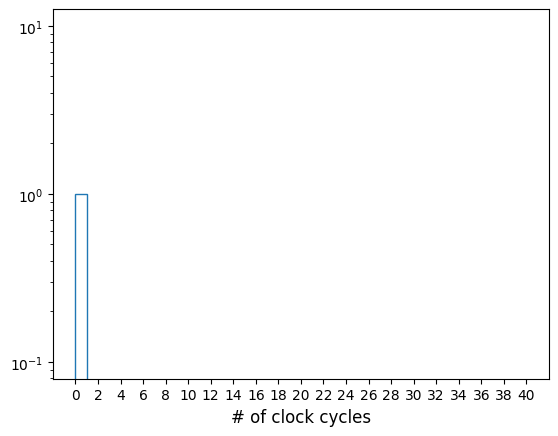

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df3['cycle'], bins=40, range=(0, 40), histtype='step')
plt.yscale('log')
plt.xticks(np.arange(0, 42, step=2))
plt.xlabel('# of clock cycles', fontsize=12)
#plt.grid(axis='x')

In [ ]:
### 3C5C pattern recognition
### Only check whether the data has 3C5C pattern at anywhere or not
### 3 C 5 C (hex)
### 0011 1100 0101 1100 (binary)
pattern = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]

matched = df3.rolling(len(pattern)).apply(lambda x: all(np.equal(x, pattern)), raw=True)
matched = matched.sum(axis = 1).astype(bool)   #Sum to perform boolean OR
idx_matched = np.where(matched)[0]
subset = [range(match-len(pattern)+1, match+1) for match in idx_matched]

In [ ]:
subset

In [ ]:
### 6AF3 pattern
### 6 A F 3
### 0110 1010 1111 0011